# About This Notebook
This notebook is for those people who are completely new to Machine Learning.
This notebook will teach you **step-by-step** how to create and test many machine learning models to get a good accuracy.
I will strongly suggest you to check out the courses provided by Kaggle if you are new to this whole Machine learning thing.In addittion to that you have to explore different Things all by yourself, You can take help of YouTube and Various free documentation

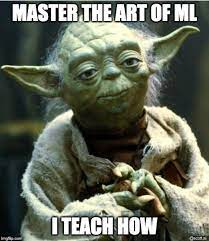

[Click here to get the Playlist for Understanding this Platform and Courses ](https://www.youtube.com/watch?v=_55G24aghPY&list=PL98nY_tJQXZnP-k3qCDd1hljVSciDV9_N)


#### This Notebook will cover these following topics
* **Basics of Pandas**
* **Handling Categorcial Values**
* **Handling NaN Values**
* **Label Encoder**
* **One Hot Encoder**
* **Standard Scaler**
* **Grid Search Cv**
* **Model Selection** 
* **Hyperparameter Tuning**


  ![](https://www.expert.ai/wp-content/uploads/2017/03/machine-learning-definition.jpeg)



## Importing all libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Reading Datset

In [ ]:
df = pd.read_csv("../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

### df.head( )
df.head() will give you the first 5 rows from your dataset

In [ ]:
df.head()

In [ ]:
df.shape

### df.isnull()sum() 
##### This statement will give the total number of null values in respected columns
After Running the below cell we can see that there are 67 null values in salary columns

In [ ]:
df.isnull().sum()

## df.info()

#### Now after getting information about the Null values we will check for the datatype for each columns 
Run the cell below

In [ ]:
df.info()

Now we can see that salary is of float64 data type

# Categorical Values

## What are Categorical Values ?
![](https://miro.medium.com/max/1400/1*wYbTRM0dgnRzutwZq63xCg.png)

#### Categorical values are those data which are of type object in our DataFrame. In Order to get maximum out of our data we have to convert the categorical data in a way in which it is understandable by our models.

#### They are of 2 type :
* Nominal
    for example : Male and Female , True and False etc
* Ordinal
    for example : Hot , Hotter , Coldest , Colder etc 

## Splitting Categorical Data and Numerical Data

![](https://i.gifer.com/origin/ba/baa8eae8c2ffd547652b428b46937c01.gif)

### Here I thought of handling Categorical and Numerical Data Seperately 

#### Run the below Cells to get the name of the columns which have object type 

In [ ]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

#### Run the below Cells to get the name of the columns which have float or numrical type 

In [ ]:
n = ((df.dtypes == "int64" ) | (df.dtypes == "float64"))
numerical_cols = list(n[n].index)
numerical_cols

In [ ]:
len(object_cols) + len(numerical_cols)

# Handling Categorical Columns

#### Creating a DataFrame with Categorical Value

In [ ]:
df_cat = df[object_cols]
df_cat

# Checking Cardinality

### What is Cardinality ??
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRVz7kw5ZQvxEqtPz-KVe0Ee-U-8ismSi1g7Z_We8Sn2kxyuY2KV9viIMa-cNvPsCSPPhU&usqp=CAU)

#### In a simnple words he cardinality of a set means the number of its elements. For example, the set A = {2, 4, 6} contains 3 elements, and therefore A has a cardinality of 3

### df.column.nunique()
#### will give you the number of unique values in a particular column

### df.column.unique()
#### will give you the unique values in a particular  column

In [ ]:
print(df.gender.nunique())
print(df.ssc_b.nunique())
print(df.workex.nunique())
print(df.specialisation.nunique())
print(df.status.nunique())
print(df.degree_t.nunique())
print(df.hsc_s.nunique())

In [ ]:
df["specialisation"].unique()

In [ ]:
df_cat.isnull().sum()

## Encoding Categorical Values using Label Encoder and One-Hot Encoder

### What is Label Encoder

#### Encode target labels with value between 0 and n_classes-1.
##### In simple words Label Encoder just gives your particular unique value a number , For example if you have a column with a nominal categorical data let say Male and female so Label Encoder with give them 0 and 1 values respectively

#### You can check out this link for more info on Label Encoder 
[Click here for more info on LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [ ]:
le = LabelEncoder()

### One mistake that i wil like to point out that i used the original df and implement my transformation on my original df. 

## **NOTE : If you transform your columns in any way , you should always create a copy of your df and then implement whatever you want**

**df_copy = df.copy()**

In [ ]:
df["gender_Encoded"] = le.fit_transform(df["gender"])
df["ssc_b_Encoded"] = le.fit_transform(df["ssc_b"])
df["hsc_b_Encoded"] = le.fit_transform(df["hsc_b"])
df["workex_Encoded"] = le.fit_transform(df["workex"])
df["specialisation_Encoder"] = le.fit_transform(df["specialisation"])
df["status_Encoded"] = le.fit_transform(df["status"])

In [ ]:
df

## What is OneHotEncoder ?

#### Instead of understanding what is one-hot encoding.I really want you to check out pd.get_dummies() method . This method works similar to OneHotEncoding and is really very easy to understand

## Why not LabelEncoding or BionomialEncoding This time ??

#### Actually when you have more than 2 and less than 10 unique values in your particular column i would suggest you to use OneHotEncoder instead of Label Encoder

[Click Here to get the info about pd.get_dummies() method](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

You just have to see the example and understand how it works 


In [ ]:
onc = OneHotEncoder(handle_unknown= 'ignore' , sparse= False)
cols_encoded = pd.DataFrame(onc.fit_transform(df[["degree_t" , "hsc_s"]]))
cols_encoded.index = df.index

#### If you will check the above example you will notice that....for example lets say if there are 3 categorical values in a particular column then this one-hot encoder or pd.get_dummies() will create 3 different columns to represent those 3 fifferent  values.

#### So i just renamed the column for better understanding 

In [ ]:
d= {
    0:"Comm&Mgmt",
    1:"Others",
    2:"Sci&Tech" ,
    3:"Arts", 
    4:"Commerce" ,
    5:"Science" }
cols_encoded.rename(columns =d ,inplace = True)

In [ ]:
cols_encoded.head()

### df_semifinal df(DataFrame) contains my encoded values with the original columns with the categorical values

In [ ]:
df_semifinal  =pd.concat([df , cols_encoded] , axis="columns")
df_semifinal.head()

### So we have to drop the columns with categorical values
## **df.drop([column_names] , axis = "colums")**

### inplace = True will change the values in the real df also , without it the operation will not get shown in a real dataset

In [ ]:
df_semifinal.drop(['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status'] , axis ="columns" , inplace= True)

In [ ]:
df_semifinal.head()

## Handling Numerical Values

![](https://i.imgflip.com/ppry6.jpg)

### Here we can see that there are 67 null values in salary columns

In [ ]:
df_semifinal.isnull().sum()

# Removing Null Values

### In Pandas missing data is represented by two value:

    None: None is a Python singleton object that is often used for missing data in Python code.
    NaN : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation
    

### You can use **df[column_name].fillna(value = df[column_name].mean() , inplace = True)** to change NaN values to mean of the whole column 

### You can also select 
* Mean
* Median
* Mode

[Check out this link to get more info about NaN values and different way to Remove them ](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)


In [ ]:
df_semifinal["salary"].fillna(value = df_semifinal["salary"].mean() , inplace = True)

In [ ]:
df_semifinal.isnull().sum()

## Using Standard Scaler

In [ ]:
df_semifinal.columns

# What is Standard Scaler
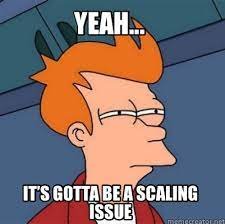
### In simple words Standard Scaler  scales the value of your data in simple range , lets say -1 to 1
[Click Here to get Information about Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
sc = StandardScaler()
encoded_num =pd.DataFrame(sc.fit_transform(df_semifinal[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']]))

It returns the columns with numerical indexes so you can rename your column in this way

In [ ]:
encoded_num.rename({
    0:"ssc_p",
    1:"hsc_p",
    2:"degree_p",
    3:"etest_p",
    4:"mba_p",
    5:"salary"
    
} , axis ="columns" , inplace= True)

## Finally we combine our preprocessed data in one DataFrame 

#### Use this combine two dataset

## **pd.concat([column_1 , column_2 , ....] , axis = columns)**

In [ ]:
df_final = pd.concat([encoded_num, df_semifinal[['gender_Encoded', 'ssc_b_Encoded', 'hsc_b_Encoded', 'workex_Encoded',
       'specialisation_Encoder', 'status_Encoded', 'Comm&Mgmt', 'Others',
       'Sci&Tech', 'Arts', 'Commerce', 'Science']]] ,axis ="columns")

In [ ]:
df_final

## Model Selection

# Creating Independent Variables and Dependent Variable

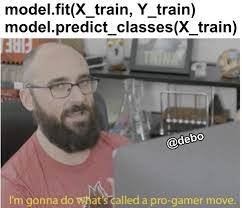

In [ ]:
X = df_final.drop("status_Encoded" , axis = "columns")
targets = df_final.status_Encoded

## Create a Dict like given below ,,just change the model and your desired params 


In [ ]:
model_params  ={ 
    'svm' : {
        'model' : svm.SVC(gamma = 'auto'),
        'params' : {
            'C' : [1 , 10  , 20] , 
            'kernel' : ['rbf' , 'linear']
        }
    },
    
    'random_forest' : {
        
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1 ,5 , 10]
        }
        
    },


'logistic_regression' : {
    
    'model' : LogisticRegression(solver = 'liblinear' , multi_class='auto'),
    'params' :{
        'C': [1 , 5 , 10]
    }
   }
}

In [ ]:
scores = []
for model_name  , mp in model_params.items():
    clf = GridSearchCV(mp['model'] , mp['params'] , cv = 5 , return_train_score=False)
    clf.fit(X, targets)
    scores.append({
        'model' : model_name ,
        'best_score' :clf.best_score_ ,
        'best_params' :clf.best_params_
    })

In [ ]:
results = pd.DataFrame(scores , columns=['model' , 'best_score' , 'best_params'])
results